In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_features.csv')
train = train.drop(107)
train.index = range(train.shape[0])
y = train['poi']
a = {True:1, False:0}
y = y.map(lambda x:a[x])
data = pd.concat([train, test])
data.index = range(data.shape[0])
data.drop('poi', axis=1, inplace=True)

In [4]:
data.isnull().mean()

bonus                        0.434483
deferral_payments            0.731034
deferred_income              0.662069
director_fees                0.882759
email_address                0.234483
exercised_stock_options      0.296552
expenses                     0.344828
from_messages                0.406897
from_poi_to_this_person      0.406897
from_this_person_to_poi      0.406897
loan_advances                0.972414
long_term_incentive          0.544828
name                         0.000000
other                        0.358621
restricted_stock             0.241379
restricted_stock_deferred    0.875862
salary                       0.344828
shared_receipt_with_poi      0.406897
to_messages                  0.406897
total_payments               0.137931
total_stock_value            0.131034
dtype: float64

In [5]:
data.describe([.05, .1, .75, .9, .95])

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
5%,2.000000e+05,1.002920e+04,-3.267011e+06,1.465700e+04,8.115175e+04,1.929600e+03,13.000000,0.000000,0.000000,6.400000e+05,9.531250e+04,2.336000e+02,1.087180e+05,-2.655791e+06,8.393720e+04,22.250000,130.000000,3.221120e+04,1.260270e+05
10%,3.000000e+05,2.540520e+04,-2.483758e+06,2.899960e+04,1.772465e+05,6.748800e+03,15.500000,0.000000,0.000000,8.800000e+05,1.429180e+05,5.032000e+02,1.402524e+05,-9.283694e+05,1.601534e+05,54.000000,217.000000,8.595920e+04,1.911380e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
90%,2.960000e+06,2.888675e+06,-1.616000e+04,1.301660e+05,7.426190e+06,1.174152e+05,1834.500000,187.000000,77.000000,8.320500e+07,1.730800e+06,1.049871e+06,2.753145e+06,-9.494100e+03,4.184572e+05,2602.000000,4141.000000,4.241141e+06,7.598959e+06
95%,5.196249e+06,3.461373e+06,-4.541800e+03,3.899946e+05,1.511763e+07,1.373057e+05,2726.750000,237.000000,194.000000,8.356500e+07,2.184926e+06,2.175433e+06,4.162984e+06,2.355923e+06,5.537659e+05,3661.500000,7301.000000,7.852481e+06,1.501364e+07


# feature engineering

In [120]:
name_1, name_2, name_3 = [], [], []
for i in data.name:
    i = i + ' na' + ' na'
    name_2.append(i.split()[1])
data['name_2'] = name_2

In [121]:
for i in data['deferral_payments']:
    if i < 0:
        data.loc[data['deferral_payments']==(i),'deferral_payments'] =-i
data['deferred_income'] = -data['deferred_income']
for i in data['restricted_stock']:
    if i < 0:
        data.loc[data['restricted_stock']==(i),'restricted_stock'] =-i
for i in data['total_stock_value']:
    if i < 0:
        data.loc[data['total_stock_value']==(i),'total_stock_value'] =-i
data.drop(['director_fees', 'restricted_stock_deferred', 'name', 'email_address'], axis = 1, inplace=True)

In [122]:
for i in data['from_messages']:
    if i > 500:
        data.loc[data['from_messages']==(i),'from_messages'] = np.nan

# Correlation coefficient & Heatmap

In [123]:
corr_data = data.drop('name_2', axis=1)
corr_data = corr_data.fillna(-1)

In [97]:
corr_data = pd.concat([corr_data[:train.shape[0]], y], axis=1)

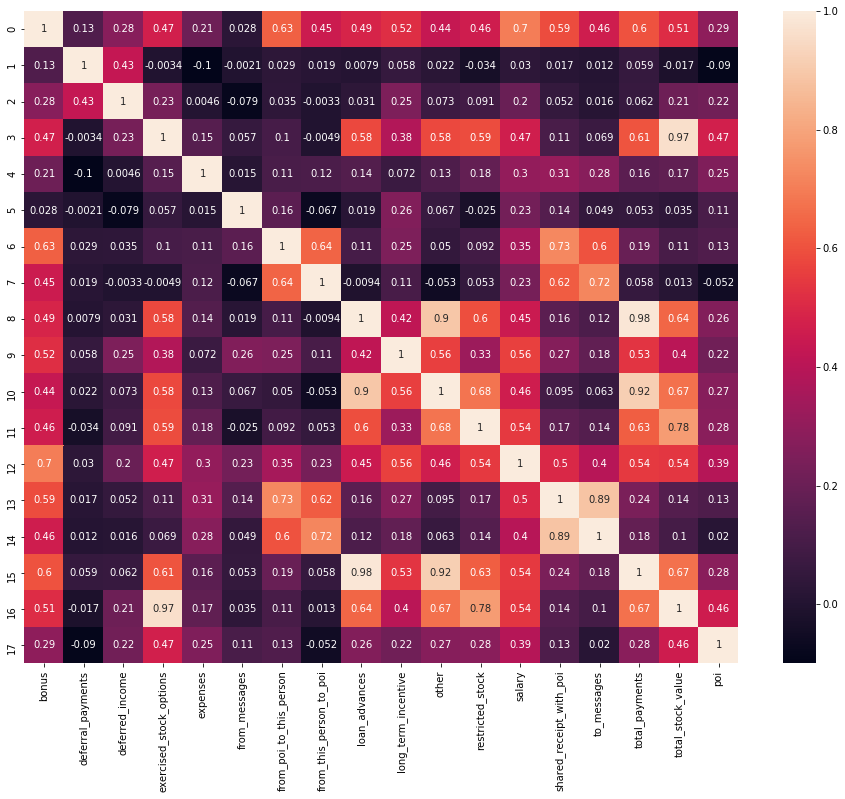

In [98]:
corr_matrix = np.corrcoef(corr_data.T)
corr_matrix = pd.DataFrame(corr_matrix, columns=corr_data.columns)
plt.figure(figsize=[16,12])
sns.heatmap(corr_matrix, annot=True)

In [124]:
final_data = data.fillna(-1)

In [125]:
final_data = pd.get_dummies(final_data, drop_first=True)

In [126]:
t_data_train = final_data[:train.shape[0]]
t_data_test = final_data[train.shape[0]:]

# Model Selection

In [104]:
MMS = MinMaxScaler().fit(t_data_train)
t_data_train = MMS.transform(t_data_train)
t_data_test = MMS.transform(t_data_test)

In [127]:
RF = RandomForestClassifier(random_state=1, n_estimators=100, class_weight='balanced')
xgb = XGBClassifier(random_state=1, n_estimators=100, class_weight='balanced')
knn =KNeighborsClassifier(n_neighbors=5, weights='distance')
NB = BernoulliNB(alpha=1)

In [128]:
cross_val_score(NB, t_data_train, y, cv=5, scoring='roc_auc').mean()

0.773157894736842

In [129]:
cross_val_score(knn, t_data_train, y, cv=5, scoring='roc_auc').mean()

0.7465789473684211

In [130]:
cross_val_score(RF, t_data_train, y, cv=5, scoring='roc_auc').mean()

0.7901754385964912

In [131]:
cross_val_score(xgb, t_data_train, y, cv=5, scoring='roc_auc').mean()

0.7867543859649123

In [137]:
NB = BernoulliNB(alpha=1).fit(t_data_train, y)
xgb = XGBClassifier(random_state=10, n_estimators=100).fit(t_data_train, y)
RF = RandomForestClassifier(random_state=1, n_estimators=100).fit(t_data_train, y)

In [138]:
NB_prob_y = NB.predict_proba(t_data_test)
xgb_prob_y = xgb.predict_proba(t_data_test)
RF_prob_y = RF.predict_proba(t_data_test)

In [139]:
RF_prob_y[:,1]

array([0.32, 0.23, 0.3 , 0.05, 0.47, 0.28, 0.44, 0.01, 0.26, 0.04, 0.07,
       0.  , 0.1 , 0.  , 0.29, 0.  , 0.03, 0.35, 0.14, 0.  , 0.78, 0.39,
       0.16, 0.04, 0.01, 0.05, 0.15, 0.01, 0.14, 0.34, 0.  , 0.04, 0.35])

In [140]:
NB_prob_y[:,1]

array([3.70472570e-01, 3.57103501e-01, 4.49283164e-01, 1.98865936e-02,
       1.44116479e-01, 2.63036416e-01, 8.31432659e-01, 1.05758191e-06,
       1.68205528e-01, 9.25576334e-03, 4.79183103e-05, 5.22723481e-07,
       3.07354624e-05, 1.00158941e-05, 9.32661923e-02, 1.70175109e-05,
       2.78035280e-02, 2.08399561e-03, 1.73848196e-02, 5.49776228e-07,
       1.78840282e-01, 4.99442325e-02, 8.12803038e-02, 3.60102552e-07,
       3.89128549e-03, 2.29441605e-02, 1.63674186e-04, 9.57111953e-06,
       2.14948012e-01, 2.70670618e-03, 1.35663995e-05, 9.50693510e-03,
       2.25954657e-01])

In [141]:
xgb_prob_y[:,1]

array([0.94234794, 0.22733867, 0.75809   , 0.04299207, 0.5041428 ,
       0.15855597, 0.73156184, 0.00348905, 0.03634141, 0.05460875,
       0.00500352, 0.00220758, 0.00424818, 0.00295771, 0.4765119 ,
       0.00243576, 0.01932178, 0.35970455, 0.06357033, 0.00299493,
       0.6164986 , 0.8147695 , 0.00739225, 0.0190851 , 0.00373777,
       0.00377761, 0.03118908, 0.00727659, 0.19512533, 0.08768932,
       0.00456812, 0.0643381 , 0.84049237], dtype=float32)

In [76]:
sample_submission = pd.read_csv('sample_submission.csv')

In [77]:
sample_submission['poi'] = xgb_prob_y[:,1]

In [78]:
sample_submission.to_csv('xgb.csv', index=False)

# Stacking

In [288]:
from mlxtend.classifier import StackingClassifier

In [293]:
NB = BernoulliNB(alpha=1)
xgb = XGBClassifier(random_state=1, n_estimators=100)
RF = RandomForestClassifier(random_state=10, n_estimators=100, max_depth=3, max_features=10)

In [294]:
meta_estimator = XGBClassifier(random_state=42, n_estimators=50)
classifier = [NB, xgb, RF]

stacking = StackingClassifier(classifier, meta_estimator, use_probas=True)

In [295]:
stacking.fit(t_data_train, y)
stacking_pred = stacking.predict_proba(t_data_test)

In [296]:
stacking_pred[:,1]

array([0.94659656, 0.05257769, 0.94659656, 0.01630665, 0.94659656,
       0.04628101, 0.94659656, 0.01051997, 0.01798466, 0.01121758,
       0.01051997, 0.01051997, 0.01051997, 0.01051997, 0.94659656,
       0.01051997, 0.01051997, 0.04782928, 0.01210544, 0.01051997,
       0.94659656, 0.94659656, 0.01051997, 0.01051997, 0.01051997,
       0.01051997, 0.01630665, 0.01051997, 0.04782928, 0.03667193,
       0.01051997, 0.01210544, 0.94659656], dtype=float32)